In [ ]:
#CNN

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2
import os
import io
import glob

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1vzvJj-fXsnuBHVe0mZXu-0gNv-bTgfiZ" -O HandDB_Lower_Alphabet.npz

--2022-09-14 07:26:34--  https://drive.google.com/uc?export=download&id=1vzvJj-fXsnuBHVe0mZXu-0gNv-bTgfiZ
Resolving drive.google.com (drive.google.com)... 172.253.122.138, 172.253.122.100, 172.253.122.102, ...
Connecting to drive.google.com (drive.google.com)|172.253.122.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/f83jhebhkv9946kjh2rb9ac14j7mnl3t/1663140375000/12360162376384578551/*/1vzvJj-fXsnuBHVe0mZXu-0gNv-bTgfiZ?e=download&uuid=2024f1fc-bfc0-4019-a3e4-30a3b34c9070 [following]
--2022-09-14 07:27:01--  https://doc-14-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/f83jhebhkv9946kjh2rb9ac14j7mnl3t/1663140375000/12360162376384578551/*/1vzvJj-fXsnuBHVe0mZXu-0gNv-bTgfiZ?e=download&uuid=2024f1fc-bfc0-4019-a3e4-30a3b34c9070
Resolving doc-14-3c-docs.googleusercontent.com (doc-14-3c-docs.googleusercontent.com)... 172.253.63.132, 2

In [ ]:
data=np.load('HandDB_Lower_Alphabet.npz', allow_pickle=True)
X=data['x']
y=data['y']
n2c=data['n2c'].item()

ターゲットの数: 26


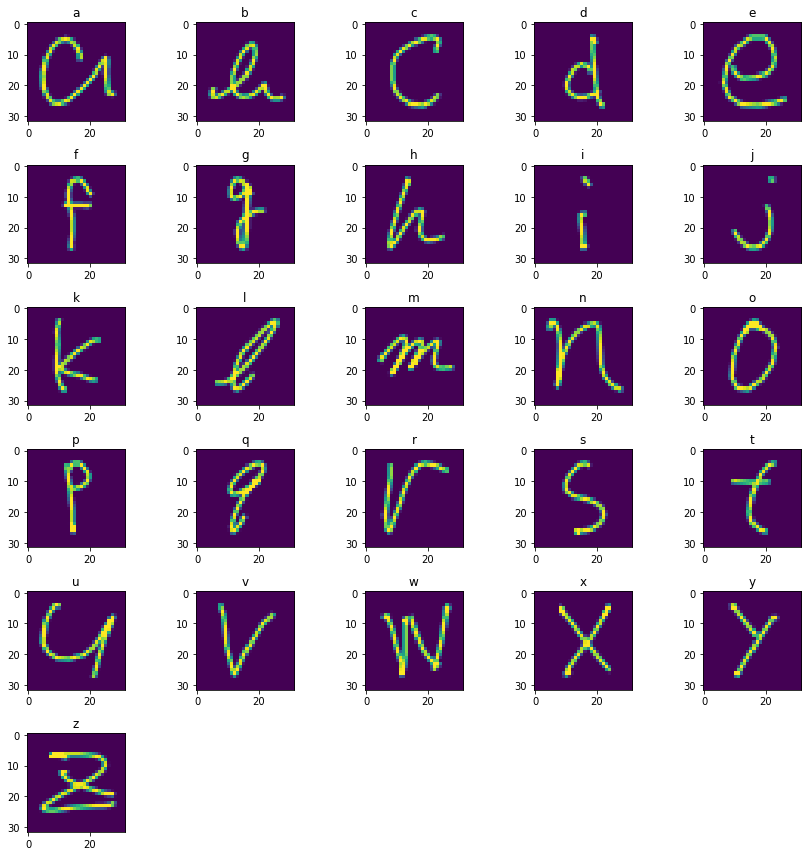

In [ ]:
n_target=max(y)+1
print('ターゲットの数:', n_target)
fig=plt.figure(figsize=(12, 12))
for i in range(n_target):
  ax=fig.add_subplot(6, 5, i+1)
  ax.imshow(X[y.tolist().index(i)].reshape(X.shape[1], X.shape[2]))
  ax.set_title(n2c[i])
plt.tight_layout()

In [ ]:
X/=255

In [ ]:
from keras import backend as K
img_rows, img_cols, img_channels=X.shape[1:]
if K.image_data_format()=='channnels_first':
  X=X.reshape(X.shape[0], img_channels, img_rows, img_cols)
  input_shape=(img_channels, img_rows, img_cols)
else:
  X=X.reshape(X.shape[0], img_rows, img_cols, img_channels)
  input_shape=(img_rows, img_cols, img_channels)

In [ ]:
from tensorflow.python import test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
#Assignment

#・When batch_size is changed from 10 to 20, total_accuracy is reduced by 0.01.
#・When batch_size is changed from 10 to 5, total_accuracy is improved by 0.01.
#・When epochs is changed from 100 to 50, total_accuracy is reduced by 0.01.
#・When epochs is changed from 100 to 200, total_accuracy is not changed.

In [ ]:
batch_size=10
num_class=n_target
epochs=100

In [ ]:
#Assignment

#・When pooling layer is added between the first convolution layer and the second convolution layer,
#total_accuracy is not changed.
#・When new convolution layer is added before flatten layer, total_accuracy is improved by 0.02.

#・When loss function is changed to mean_squared_logarithmic_error, total_accuracy is changed to 0.04.
#・When optimizer function is changed to Adadelta, total_accuracy is changed to 0.81. 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adamax
import tensorflow as tf

model=tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(num_class, activation='softmax'))


model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adamax',
              metrics=['accuracy'])

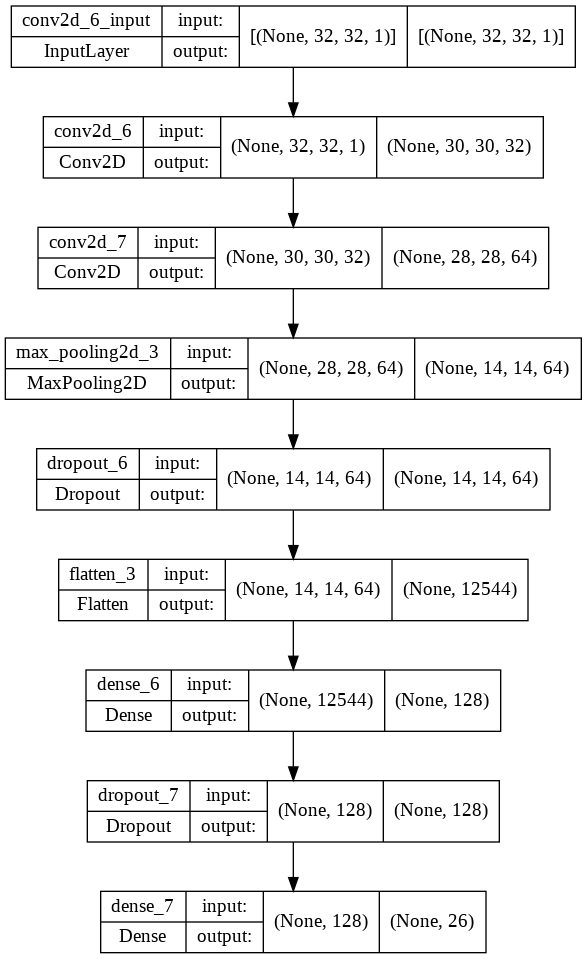

In [ ]:
from keras.utils.vis_utils import plot_model
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
hist=model.fit(X_train, y_train,
               batch_size=batch_size,
               epochs=epochs,
               verbose=1,
               validation_data=(X_test, y_test))

Epoch 1/100
230/230 [==============================] - 11s 47ms/step - loss: 2.0331 - accuracy: 0.4043 - val_loss: 0.8950 - val_accuracy: 0.7653
Epoch 2/100
230/230 [==============================] - 11s 46ms/step - loss: 1.1633 - accuracy: 0.6639 - val_loss: 0.6697 - val_accuracy: 0.8214
Epoch 3/100
230/230 [==============================] - 11s 46ms/step - loss: 0.9396 - accuracy: 0.7243 - val_loss: 0.5620 - val_accuracy: 0.8514
Epoch 4/100
230/230 [==============================] - 11s 46ms/step - loss: 0.7829 - accuracy: 0.7709 - val_loss: 0.5008 - val_accuracy: 0.8670
Epoch 5/100
230/230 [==============================] - 11s 47ms/step - loss: 0.6660 - accuracy: 0.7987 - val_loss: 0.4332 - val_accuracy: 0.8801
Epoch 6/100
230/230 [==============================] - 11s 46ms/step - loss: 0.5717 - accuracy: 0.8300 - val_loss: 0.3922 - val_accuracy: 0.8931
Epoch 7/100
230/230 [==============================] - 11s 46ms/step - loss: 0.4931 - accuracy: 0.8570 - val_loss: 0.3635 - val_ac

In [ ]:
score=model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4212816059589386
Test accuracy: 0.9348109364509583


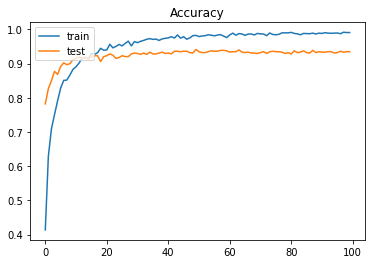

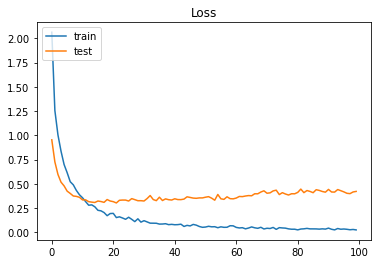

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

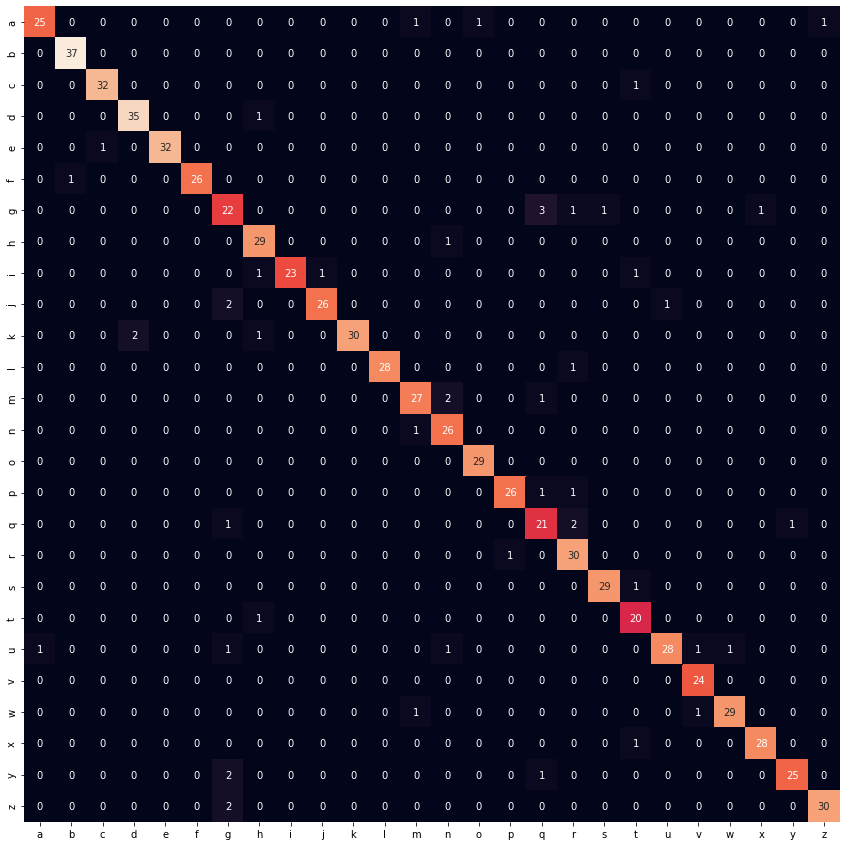

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

predicted=np.argmax(model.predict(X_test), axis=1)
cmx=confusion_matrix(y_test, predicted)
df_cmx=pd.DataFrame(cmx, index=n2c.values(), columns=n2c.values())
plt.figure(figsize=(15, 15))
sns.heatmap(df_cmx, annot=True, cbar=False, square=True, fmt='d')

In [ ]:
#RNN

In [ ]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import re
import glob

from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1Xbs8tNR8G59ptaLETc6dU44G0agFmC8z" -O SVC2004_Task1_5users.npz

--2022-09-14 10:41:55--  https://drive.google.com/uc?export=download&id=1Xbs8tNR8G59ptaLETc6dU44G0agFmC8z
Resolving drive.google.com (drive.google.com)... 74.125.124.100, 74.125.124.101, 74.125.124.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.124.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2vkoaafa51rai4k0ampab2h2h6idf71j/1663152075000/12360162376384578551/*/1Xbs8tNR8G59ptaLETc6dU44G0agFmC8z?e=download&uuid=9f1ee657-92ca-4a87-9c51-636be57d356e [following]
--2022-09-14 10:41:56--  https://doc-14-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2vkoaafa51rai4k0ampab2h2h6idf71j/1663152075000/12360162376384578551/*/1Xbs8tNR8G59ptaLETc6dU44G0agFmC8z?e=download&uuid=9f1ee657-92ca-4a87-9c51-636be57d356e
Resolving doc-14-3c-docs.googleusercontent.com (doc-14-3c-docs.googleusercontent.com)... 142.251.161.132, 2607

In [ ]:
data=np.load('SVC2004_Task1_5users.npz')

In [ ]:
X=data['x']
user=data['user']
genuine=data['genuine']
X_length=data['x_length']

In [ ]:
num_user=max(user)+1
timesteps, features=X.shape[-2:]
print('Number of Users:', num_user)
print('Timesteps:', timesteps)
print('Features:', features)

Number of Users: 5
Timesteps: 784
Features: 4


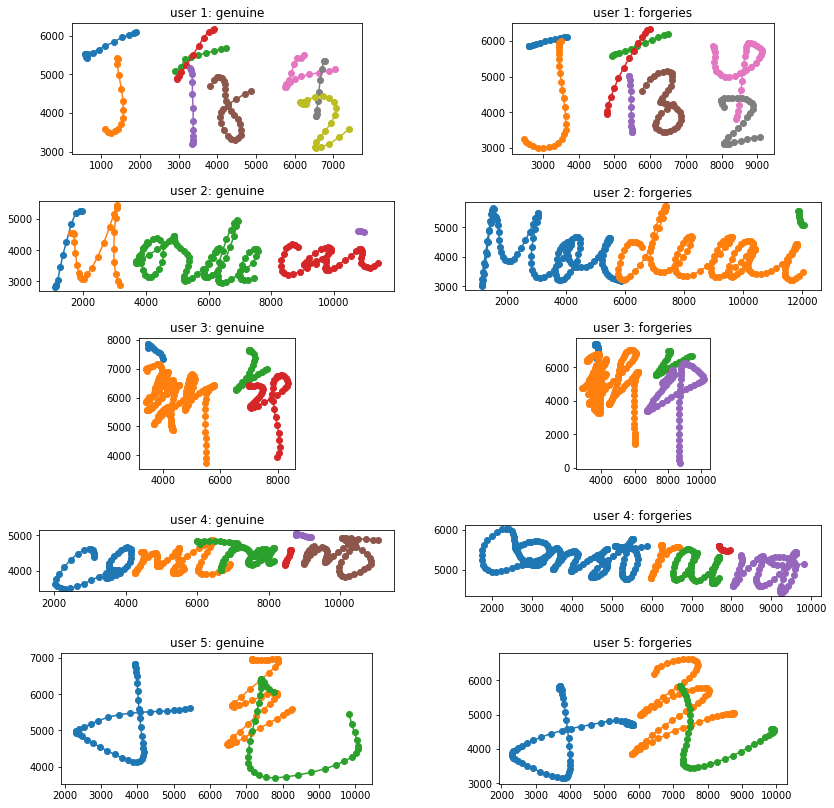

In [ ]:
fig=plt.figure(figsize=(14, 14))
for i in range(num_user):
  for j in range(2):
    data=X[user == i][j*20]
    n_stroke=data[:, 0].max()
    ax=fig.add_subplot(5, 2, i*2+j+1)
    for i_stroke in range(n_stroke+1):
      ax.plot(*data[data[:, 0] == i_stroke][:, [1, 2]].T, marker='o')
      ax.set_title(f'user {i+1}: {"genuine" if j == 0 else "forgeries"}')
      ax.set_aspect('equal')

In [ ]:
import gc
from tensorflow.compat.v1.keras.backend import set_session
from tensorflow.compat.v1.keras.backend import clear_session
from tensorflow.compat.v1.keras.backend import get_session
import tensorflow

def reset_keras():
  sess=get_session()
  clear_session()
  sess.close()
  sess=get_session()

  try:
    del num_classifier
  except:
    pass

    gc.collect()

    config=tensorflow.ConfigProto()
    config.gpu_options.per_process_gpu_memory_fraction=1
    config.gpu_options.visible_device_list='0'
    set_session(tensorflow.Session(config=config))

In [42]:
from sklearn.metrics import roc_curve

def get_eer(y_true, y_score):
  fpr, tpr, threshold=roc_curve(y_true, y_score, pos_label=1)
  fnr=1-tpr
  eer_threshold=threshold[np.nanargmin(np.absolute((fnr-fpr)))]
  EER=fpr[np.nanargmin(np.absolute((fnr-fpr)))]
  return EER

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding, Masking
from keras.layers import LSTM, Bidirectional
import tensorflow as tf

In [16]:
#Assignment

#・When Biderectional LSTM is used, accuracy is reduced by 0.2.

#・When loss function is 'squared_hinge', accuracy is changed to 0.38.
#・When optimizer function is 'Adadelta', accuracy is changed to 0.0.

In [88]:
def build_model(input_shape):
  model=tf.keras.Sequential()

  model.add(tf.keras.layers.Masking(mask_value=-1, input_shape=(timesteps, features)))
  model.add(tf.keras.layers.LSTM(128, return_sequences=False, recurrent_dropout=0.5))
  model.add(tf.keras.layers.Dense(num_user, activation='softmax'))

  model.compile(loss='sparse_categorical_crossentropy',
                optimizer='rmsprop',
                metrics=['accuracy'])
  
  return model

In [ ]:
#Assignment

#・When epochs is changed from 20 to 10, accuracy is reduced by 0.3.
#・When epochs is changed from 20 to 30, accuracy is improved by 0.04.
#・When batch_size is changed from 100 to 50, accuracy is reduced by 0.3.
#・When batch_size is changed from 100 to 200, accuracy is reduced by 0.3

In [68]:
batch_size=100
epochs=20

In [89]:
test_size=0.2

for user_index in range(num_user):
  print('user_index:', user_index)
  mask=user == user_index
  X_train, X_test, y_train, y_test=train_test_split(X[mask], genuine[mask], test_size=test_size, random_state=7, shuffle=True, stratify=genuine[mask])
  model=build_model(input_shape=(timesteps, features))
  model.fit(X_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=1,
            validation_data=(X_test, y_test))

user_index: 0
Epoch 1/20
1/1 [==============================] - 5s 5s/step - loss: 1.1082 - accuracy: 0.4375 - val_loss: 0.9397 - val_accuracy: 0.6250
Epoch 2/20
1/1 [==============================] - 3s 3s/step - loss: 0.9075 - accuracy: 0.7188 - val_loss: 0.8823 - val_accuracy: 0.7500
Epoch 3/20
1/1 [==============================] - 3s 3s/step - loss: 0.8118 - accuracy: 0.7188 - val_loss: 0.8744 - val_accuracy: 0.7500
Epoch 4/20
1/1 [==============================] - 3s 3s/step - loss: 0.7656 - accuracy: 0.7500 - val_loss: 0.7254 - val_accuracy: 0.7500
Epoch 5/20
1/1 [==============================] - 3s 3s/step - loss: 0.7004 - accuracy: 0.8438 - val_loss: 0.6994 - val_accuracy: 0.7500
Epoch 6/20
1/1 [==============================] - 3s 3s/step - loss: 0.6663 - accuracy: 0.8750 - val_loss: 0.7452 - val_accuracy: 0.7500
Epoch 7/20
1/1 [==============================] - 3s 3s/step - loss: 0.6576 - accuracy: 0.8750 - val_loss: 0.6832 - val_accuracy: 0.7500
Epoch 8/20
1/1 [===========

user_index: 1
Epoch 1/20
1/1 [==============================] - 5s 5s/step - loss: 2.3952 - accuracy: 0.0000e+00 - val_loss: 1.9856 - val_accuracy: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 3s 3s/step - loss: 1.8876 - accuracy: 0.0000e+00 - val_loss: 1.7102 - val_accuracy: 0.0000e+00
Epoch 3/20
1/1 [==============================] - 3s 3s/step - loss: 1.6008 - accuracy: 0.0000e+00 - val_loss: 1.5321 - val_accuracy: 0.0000e+00
Epoch 4/20
1/1 [==============================] - 3s 3s/step - loss: 1.3977 - accuracy: 0.0312 - val_loss: 1.4868 - val_accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 3s 3s/step - loss: 1.3412 - accuracy: 0.4375 - val_loss: 1.4123 - val_accuracy: 0.5000
Epoch 6/20
1/1 [==============================] - 3s 3s/step - loss: 1.2957 - accuracy: 0.5000 - val_loss: 1.3610 - val_accuracy: 0.5000
Epoch 7/20
1/1 [==============================] - 3s 3s/step - loss: 1.2369 - accuracy: 0.5625 - val_loss: 1.3169 - val_accuracy: 0.5000
Epo

user_index: 2
Epoch 1/20
1/1 [==============================] - 6s 6s/step - loss: 2.0915 - accuracy: 0.0000e+00 - val_loss: 1.7097 - val_accuracy: 0.1250
Epoch 2/20
1/1 [==============================] - 3s 3s/step - loss: 1.6819 - accuracy: 0.0625 - val_loss: 1.5139 - val_accuracy: 0.1250
Epoch 3/20
1/1 [==============================] - 3s 3s/step - loss: 1.4715 - accuracy: 0.1562 - val_loss: 1.4939 - val_accuracy: 0.1250
Epoch 4/20
1/1 [==============================] - 3s 3s/step - loss: 1.4323 - accuracy: 0.1562 - val_loss: 1.4322 - val_accuracy: 0.1250
Epoch 5/20
1/1 [==============================] - 3s 3s/step - loss: 1.3719 - accuracy: 0.2500 - val_loss: 1.4294 - val_accuracy: 0.1250
Epoch 6/20
1/1 [==============================] - 3s 3s/step - loss: 1.3218 - accuracy: 0.3125 - val_loss: 1.3896 - val_accuracy: 0.1250
Epoch 7/20
1/1 [==============================] - 3s 3s/step - loss: 1.2751 - accuracy: 0.4062 - val_loss: 1.3524 - val_accuracy: 0.2500
Epoch 8/20
1/1 [=======

user_index: 3
Epoch 1/20
1/1 [==============================] - 6s 6s/step - loss: 2.2023 - accuracy: 0.0000e+00 - val_loss: 1.8081 - val_accuracy: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 3s 3s/step - loss: 1.7611 - accuracy: 0.0000e+00 - val_loss: 1.5814 - val_accuracy: 0.2500
Epoch 3/20
1/1 [==============================] - 3s 3s/step - loss: 1.4326 - accuracy: 0.5938 - val_loss: 1.4694 - val_accuracy: 0.6250
Epoch 4/20
1/1 [==============================] - 3s 3s/step - loss: 1.3164 - accuracy: 0.6875 - val_loss: 1.4486 - val_accuracy: 0.6250
Epoch 5/20
1/1 [==============================] - 3s 3s/step - loss: 1.2743 - accuracy: 0.7500 - val_loss: 1.3393 - val_accuracy: 0.6250
Epoch 6/20
1/1 [==============================] - 3s 3s/step - loss: 1.1820 - accuracy: 0.7812 - val_loss: 1.2520 - val_accuracy: 0.6250
Epoch 7/20
1/1 [==============================] - 3s 3s/step - loss: 1.1171 - accuracy: 0.7812 - val_loss: 1.2541 - val_accuracy: 0.6250
Epoch 8/20
1/1 

user_index: 4
Epoch 1/20
1/1 [==============================] - 5s 5s/step - loss: 2.3037 - accuracy: 0.0000e+00 - val_loss: 2.1265 - val_accuracy: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 3s 3s/step - loss: 1.8903 - accuracy: 0.0000e+00 - val_loss: 1.8667 - val_accuracy: 0.0000e+00
Epoch 3/20
1/1 [==============================] - 3s 3s/step - loss: 1.6907 - accuracy: 0.0312 - val_loss: 1.5889 - val_accuracy: 0.1250
Epoch 4/20
1/1 [==============================] - 3s 3s/step - loss: 1.5202 - accuracy: 0.0938 - val_loss: 1.5109 - val_accuracy: 0.3750
Epoch 5/20
1/1 [==============================] - 3s 3s/step - loss: 1.4748 - accuracy: 0.2500 - val_loss: 1.5907 - val_accuracy: 0.1250
Epoch 6/20
1/1 [==============================] - 3s 3s/step - loss: 1.4121 - accuracy: 0.3750 - val_loss: 1.4675 - val_accuracy: 0.5000
Epoch 7/20
1/1 [==============================] - 3s 3s/step - loss: 1.3322 - accuracy: 0.8438 - val_loss: 1.3802 - val_accuracy: 0.6250
Epoch 8/20


In [90]:
score=model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.0994749069213867
Test accuracy: 0.625


In [52]:
train_EER_list=[]
test_EER_list=[]
test_size=0.2

for user_index in range(num_user):
  print('user_index:', user_index)
  mask=user == user_index
  X_train, X_test, y_train, y_test=train_test_split(X[mask], genuine[mask], test_size=test_size, random_state=7, shuffle=True, stratify=genuine[mask])
  model=build_model(input_shape=(timesteps, features))
  model.fit(X_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=1,
            validation_data=(X_test, y_test))
  pred_train=model.predict(X_train)
  pred_test=model.predict(X_test)
  train_eer=get_eer(y_train, pred_train)
  #I got a error 'ValueError: y should be a 1d array, got an array of shape (32, 5) instead'.
  #I don't know way of fixing, so once I want to exclude EER.
  test_eer=get_eer(y_test, pred_test)
  print('train EER(%):', train_eer*100)
  print('test EER(%):', test_eer*100)
  train_EER_list.append(train_eer*100)
  test_EER_list.append(test_eer*100)
  del model
  print()

user_index: 0
Epoch 1/20
1/1 [==============================] - 5s 5s/step - loss: 1.8593 - accuracy: 0.0000e+00 - val_loss: 1.2858 - val_accuracy: 0.6250
Epoch 2/20
1/1 [==============================] - 3s 3s/step - loss: 1.4396 - accuracy: 0.4375 - val_loss: 1.1289 - val_accuracy: 0.7500
Epoch 3/20
1/1 [==============================] - 3s 3s/step - loss: 1.2052 - accuracy: 0.6875 - val_loss: 1.0220 - val_accuracy: 0.8750
Epoch 4/20
1/1 [==============================] - 3s 3s/step - loss: 1.1299 - accuracy: 0.6875 - val_loss: 0.9842 - val_accuracy: 0.8750
Epoch 5/20
1/1 [==============================] - 3s 3s/step - loss: 1.0952 - accuracy: 0.6562 - val_loss: 0.9431 - val_accuracy: 1.0000
Epoch 6/20
1/1 [==============================] - 3s 3s/step - loss: 1.0370 - accuracy: 0.7500 - val_loss: 0.9182 - val_accuracy: 1.0000
Epoch 7/20
1/1 [==============================] - 4s 4s/step - loss: 1.0145 - accuracy: 0.7500 - val_loss: 0.9132 - val_accuracy: 0.8750
Epoch 8/20
1/1 [=======

ValueError: ignored

In [50]:
print('Average Train EER(%):', np.mean(train_EER_list))
print('Average Test EER(%):', np.mean(test_EER_list))

Average Train EER(%): nan
Average Test EER(%): nan


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
